<a href="https://colab.research.google.com/github/lindseyvanosky/Neural-Network-Kaggle-Exercise/blob/main/LV_Neural_Network_Kaggle_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Kaggle Exercise
- Lindsey Vanosky 
- 08.03.22

#Import, Upload & Inspect

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics


filename = "/content/drive/MyDrive/Coding Dojo/03 Stack 3: Advanced Machine Learning/Data Sets/train.csv"
#pd.set_option('display.max_rows', None)

df = pd.read_csv(filename)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Data Cleaning 

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df = df.drop(columns = ["PoolQC", "Fence", "MiscFeature", "FireplaceQu", "Alley", "Id"])
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [ ]:
df["LotFrontage"].value_counts(ascending = False) #impute with .mean

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [ ]:
df["BsmtFinType2"].value_counts() #impute all bsmt features with most frequent

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [ ]:
df["GarageCond"].value_counts() #impute all garage features with most frequent

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [ ]:
df.dropna(subset = ["Electrical"], inplace = True)
df["Electrical"].isna().sum()

0

#Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1200 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [ ]:
x = df.drop(columns = ["SalePrice"])
y = df["SalePrice"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = "ignore", sparse = False)

cat_select = make_column_selector(dtype_include = "object")
num_select = make_column_selector(dtype_include = "number")

freq_imputer = SimpleImputer(strategy = "most_frequent")
mean_imputer = SimpleImputer(strategy = "mean")

num_pipe = make_pipeline(scaler, mean_imputer)
cat_pipe = make_pipeline(ohe, freq_imputer)

num_tuple = (num_pipe, num_select)
cat_tuple = (cat_pipe, cat_select)

preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f609b073910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f60a768b210>

In [ ]:
preprocessor.fit(x_train, y_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f609b073910>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f60a768b210>

In [ ]:
x_train_processed = preprocessor.transform(x_train)
x_test_processed = preprocessor.transform(x_test)

In [ ]:
print(np.isnan(x_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(x_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', x_train_processed.dtype)
print('All data in X_test_processed are', x_test_processed.dtype)
print('\n')
print('shape of data is', x_train_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (1094, 275)




#*Models with Consistent Parameters*

##Model 1 - No Regularization

###Function for plotting

In [ ]:
def plot_history(history):
  
  metrics = history.history.keys()
  
  for metric in metrics:
      if not "val" in metric:
        plt.plot(history.history[f"{metric}"], label = f"{metric}")
        if f"val_{metric}" in metrics:
          plt.plot(history.history[f"val_{metric}"], label = f"val_{metric}")
        plt.legend()
        plt.title(f"{metric}")
        plt.show()

###Instantiation

In [ ]:
x_train_processed.shape

(1094, 275)

In [ ]:
model = Sequential() #Params = 200, 100 and epoch 100

input_dim = x_train_processed.shape[1]

model.add(Dense(200, input_dim = input_dim, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1, activation = "linear"))

###Compiling

In [ ]:
model.compile(loss = "mse", optimizer = "adam", metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

###Fit & Visualize Results

In [ ]:
history = model.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 100, verbose = 0)

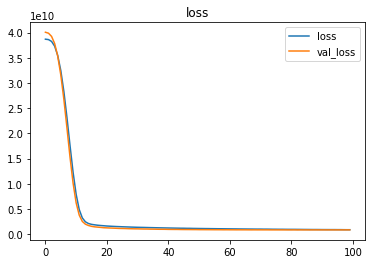

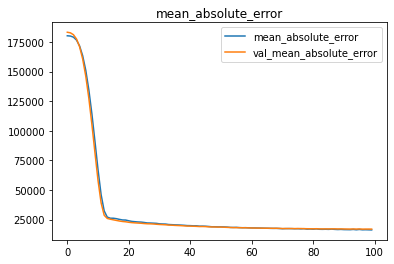

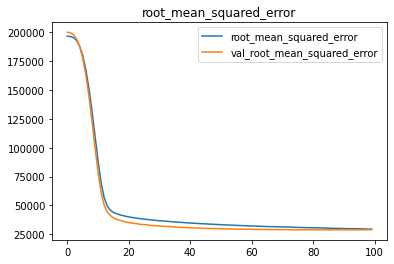

In [ ]:
plot_history(history)

###Final Scores

In [ ]:
preds = model.predict(x_test_processed)  #Params = 200, 100 and epoch 100

print(f"final RMSE: {np.sqrt(mean_squared_error(y_test, preds))}")
print(f"final MAE: {mean_absolute_error(y_test, preds)}")
print(f"final R2: {r2_score(y_test, preds)}")

final RMSE: 28859.470371299572
final MAE: 16989.276803296234
final R2: 0.8724325696764013


##Model 2 - With Regularization (Dropout)

###Instantiation

In [ ]:
model_2 = Sequential() #Params = 200, 100, epoch 100 and dropout .20

input_dim_2 = x_train_processed.shape[1]

model_2.add(Dense(200, input_dim = input_dim_2, activation = "relu"))
model_2.add(Dropout(.2))
model_2.add(Dense(100, activation = "relu"))
model_2.add(Dropout(.2))
model_2.add(Dense(1, activation = "linear"))

###Compiling 

In [ ]:
model_2.compile(loss = "mse", optimizer = "adam", metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

###Fit & Visualize Results

In [ ]:
history_2 = model_2.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 100, verbose = 0)

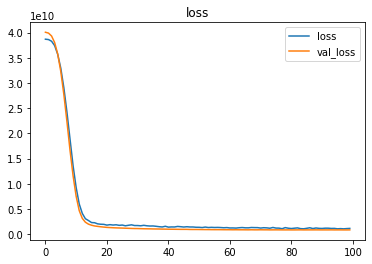

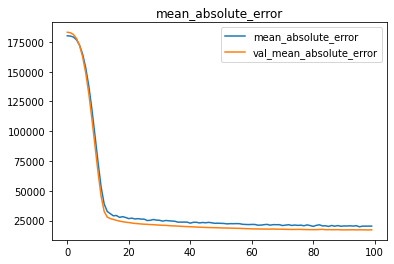

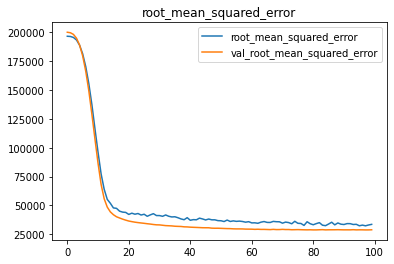

In [ ]:
plot_history(history_2)

###Final Scores

In [ ]:
preds_2 = model_2.predict(x_test_processed) #Params = 200, 100, epoch 100 and dropout .20

print(f"final RMSE: {np.sqrt(mean_squared_error(y_test, preds_2))}")
print(f"final MAE: {mean_absolute_error(y_test, preds_2)}")
print(f"final R2: {r2_score(y_test, preds_2)}")

final RMSE: 28857.860788278464
final MAE: 17268.55209760274
final R2: 0.8724467989495859


##Model 3 - With Regularization (Early Stopping)

###Instantiation

In [ ]:
model_3 = Sequential() #Params = 200, 100, epoch 100 and patience 5

input_dim_3 = x_train_processed.shape[1]

model_3.add(Dense(200, input_dim = input_dim_3, activation = "relu"))

model_3.add(Dense(100, activation = "relu"))

model_3.add(Dense(1, activation = "linear"))

###Compiling 

In [ ]:
model_3.compile(loss = "mse", optimizer = "adam", metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
early_stopping = EarlyStopping(patience = 5)


###Fit & Visualize Results

In [ ]:
history_3 = model_3.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 100, callbacks = [early_stopping], verbose = 0)

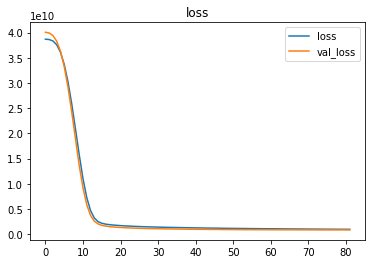

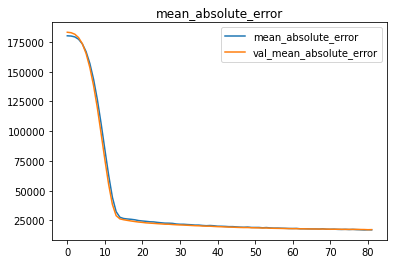

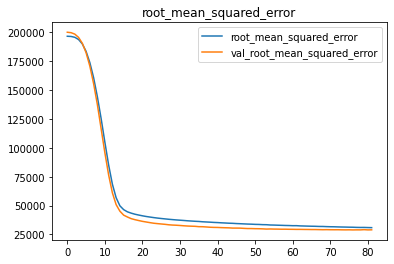

In [ ]:
plot_history(history_3)

###Final Scores

In [ ]:
preds_3 = model_3.predict(x_test_processed) #Params = 200, 100, epoch 100 and patience 5

print(f"final RMSE: {np.sqrt(mean_squared_error(y_test, preds_3))}")
print(f"final MAE: {mean_absolute_error(y_test, preds_3)}")
print(f"final R2: {r2_score(y_test, preds_3)}")

final RMSE: 28966.213620837098
final MAE: 17331.690202268837
final R2: 0.8714871507499603


#*Models with Parameter Tuning*

##Model 1 - No Regularization

###Instantiation

In [ ]:
tune_model_1 = Sequential() #Params = 200, 100, 50 and epoch 40

tune_input_dim_1 = x_train_processed.shape[1]

tune_model_1.add(Dense(200, input_dim = tune_input_dim_1, activation = "relu"))
tune_model_1.add(Dense(100, activation = "relu"))
tune_model_1.add(Dense(50, activation = "relu"))
tune_model_1.add(Dense(1, activation = "linear"))

###Compiling

In [ ]:
tune_model_1.compile(loss = "mse", optimizer = "adam", metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])

###Fit & Visualize Results

In [ ]:
tune_history_1 = tune_model_1.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 40, verbose = 0)

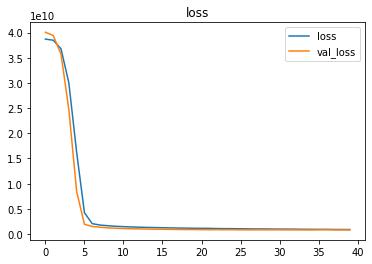

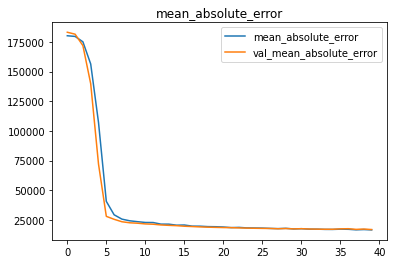

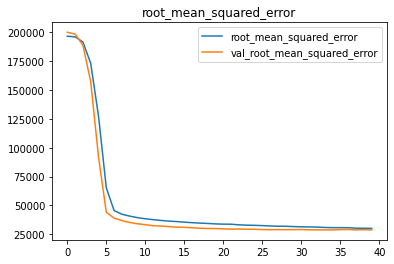

In [ ]:
plot_history(tune_history_1)

###Final Scores

In [ ]:
tune_preds_1 = tune_model_1.predict(x_test_processed) #Params = 200, 100, 50 and epoch 40

print(f"final RMSE: {np.sqrt(mean_squared_error(y_test, tune_preds_1))}")
print(f"final MAE: {mean_absolute_error(y_test, tune_preds_1)}")
print(f"final R2: {r2_score(y_test, tune_preds_1)}")

final RMSE: 28694.88828645475
final MAE: 16916.939008989724
final R2: 0.8738834242138322


##Model 2 - With Regularization (Dropout)

###Instantiation

In [ ]:
tune_model_2 = Sequential() #Params = 200, 100, 50, epoch 40 and dropout .10

tune_input_dim_2 = x_train_processed.shape[1]

tune_model_2.add(Dense(200, input_dim = tune_input_dim_2, activation = "relu"))
tune_model_2.add(Dropout(.10))
tune_model_2.add(Dense(100, activation = "relu"))
tune_model_2.add(Dropout(.10))
tune_model_2.add(Dense(50, activation = "relu"))
tune_model_2.add(Dropout(.10))
tune_model_2.add(Dense(1, activation = "linear"))

###Compiling

In [ ]:
tune_model_2.compile(loss = "mse", optimizer = "adam", metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])


###Fit & Visualize Results

In [ ]:
tune_history_2 = tune_model_2.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 40, verbose = 0)

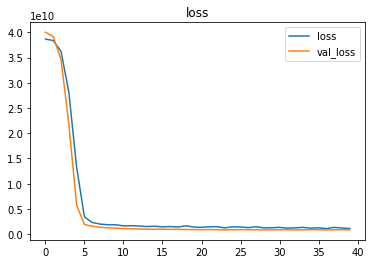

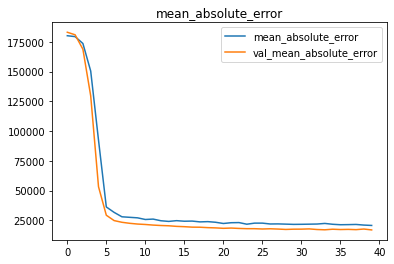

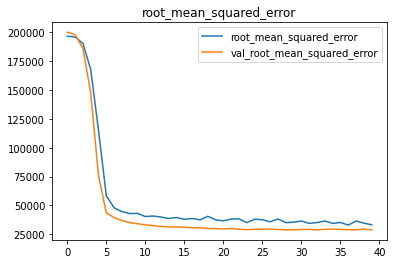

In [ ]:
plot_history(tune_history_2)

###Final Scores

In [ ]:
tune_preds_2 = tune_model_2.predict(x_test_processed) #Params = 200, 100, 50, epoch 40 and dropout .10


print(f"final RMSE: {np.sqrt(mean_squared_error(y_test, tune_preds_2))}")
print(f"final MAE: {mean_absolute_error(y_test, tune_preds_2)}")
print(f"final R2: {r2_score(y_test, tune_preds_2)}")

final RMSE: 28779.33491488512
final MAE: 16900.234835188356
final R2: 0.8731400311252566


##Model 3 - With Regularization (Early Stopping)

###Instantiation

In [ ]:
tune_model_3 = Sequential() #Params = 200, 100, 50, epoch 40 and patience 3

tune_input_dim_3 = x_train_processed.shape[1]

tune_model_3.add(Dense(200, input_dim = input_dim_3, activation = "relu"))

tune_model_3.add(Dense(100, activation = "relu"))

tune_model_3.add(Dense(50, activation = "relu"))

tune_model_3.add(Dense(1, activation = "linear"))

###Compiling

In [ ]:
tune_model_3.compile(loss = "mse", optimizer = "adam", metrics = [metrics.MeanAbsoluteError(), metrics.RootMeanSquaredError()])
tune_early_stopping = EarlyStopping(patience = 3)


###Fit & Visualize Results

In [ ]:
tune_history_3 = tune_model_3.fit(x_train_processed, y_train, validation_data = (x_test_processed, y_test), epochs = 40, callbacks = [tune_early_stopping], verbose = 0)

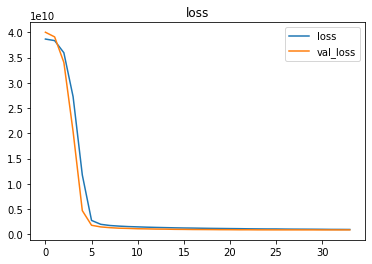

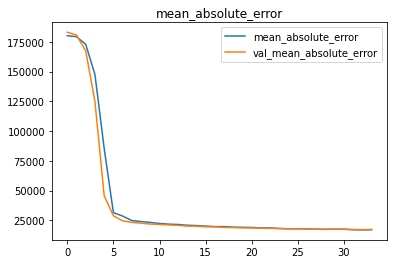

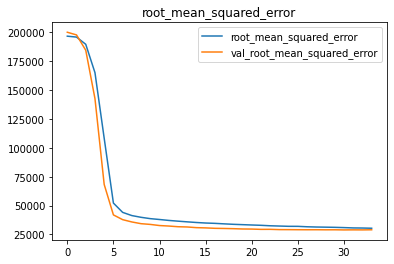

In [ ]:
plot_history(tune_history_3)

###Final Scores

In [ ]:
tune_preds_3 = model_3.predict(x_test_processed) #Params = 200, 100, 50, epoch 40 and patience 3

print(f"final RMSE: {np.sqrt(mean_squared_error(y_test, tune_preds_3))}")
print(f"final MAE: {mean_absolute_error(y_test, tune_preds_3)}")
print(f"final R2: {r2_score(y_test, tune_preds_3)}")

final RMSE: 28966.213620837098
final MAE: 17331.690202268837
final R2: 0.8714871507499603


#Conclusion

After initiating and scoring each of these neural networks, it became clear that this set of data did not play well with the Early Stopping regularization as our scores were consistently higher than the other models, even with parameter tuning. 
<br></br>
However, it looks like this data did well with the Dropout regularizarion as we were able to achieve our lowest scores with this model. With further tuning, I believe this model could perform even better. 